<a href="https://colab.research.google.com/github/NeZorinEgor/Bookstore-DB/blob/main/texture/texture_on_cube.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage.draw import polygon

In [15]:
def resize_image(image_path, target_size=(512, 512)):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    resized_image = cv2.resize(image, target_size)
    return resized_image

In [16]:
def draw_texture(cube_image, texture_image, sides_vertices):
    cube_with_texture = cube_image.copy()
    for side in sides_vertices:
        src_points = np.float32(side)
        dst_points = np.array([[min(side[:, 0]), min(side[:, 1])],
                               [max(side[:, 0]), min(side[:, 1])],
                               [max(side[:, 0]), max(side[:, 1])],
                               [min(side[:, 0]), max(side[:, 1])]], dtype=np.float32)
        transform_matrix = cv2.getPerspectiveTransform(dst_points, src_points)

        warped_texture = cv2.warpPerspective(texture_image, transform_matrix, (512, 512))

        mask = np.zeros((512, 512), dtype=bool)
        rr, cc = polygon(side[:, 1], side[:, 0])
        mask[rr, cc] = True

        for c in range(3):
            cube_with_texture[:, :, c][mask] = warped_texture[:, :, c][mask]

    return cube_with_texture

In [17]:
texture = resize_image('texture.png')
cube = resize_image('cube.jpg')

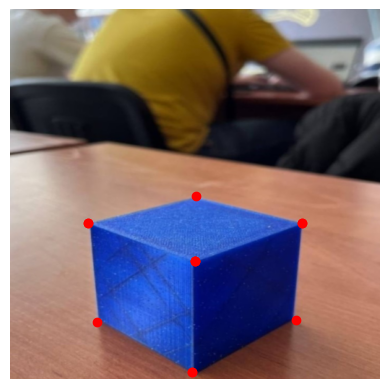

In [18]:
top_vertices = np.array([[108, 295], [257, 258], [404, 295], [256, 348]])
left_vertices = np.array([[108, 295], [256, 348], [252, 502], [120, 432]])
right_vertices = np.array([[256, 348], [404, 295], [395, 430], [252, 502]])

sides_vertices = [top_vertices, left_vertices, right_vertices]

fig, ax = plt.subplots()

ax.imshow(cube_image)
ax.set_axis_off()

for i, side in enumerate(sides_vertices):
    for j, point in enumerate(side):
        ax.scatter(point[0], point[1], color='red', marker='o')

plt.show()

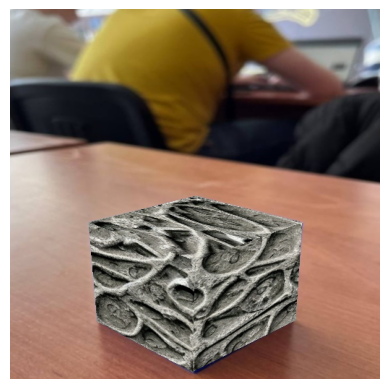

In [19]:
result_image = draw_texture(cube_image, texture_image, sides_vertices)

plt.imshow(result_image)
plt.axis('off')
plt.show()